### _k_-NN Exploratory
Exploration of the predictive capacity of _k_-NN directly on the mass spectra vectors and endpoints. _k_-NN shows low recall and precision, incorporating the molecular networks approach improves these metrics as shown in 06b.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/processed/MS2_tox/2023_05_07_intensity_matrix_endpoints.csv', index_col=False) 
#df = pd.read_csv('../data/processed/MS2_tox/combined_spectra_vector_endpoints.csv', index_col=False) #from 01_preprocessing.ipynb
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,10.45,11.049999999999997,11.949999999999992,12.049999999999994,12.54999999999999,15.449999999999982,17.049999999999976,17.149999999999974,17.649999999999974,18.34999999999997,...,NR.AR.LBD,NR.Aromatase,NR.ER,NR.ER.LBD,NR.PPAR.gamma,SR.ARE,SR.ATAD5,SR.HSE,SR.MMP,SR.p53
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0


In [3]:
endpoints=df.columns[-12:].tolist()

### Best k-value: exploring the neighborhood

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def best_k(endpoint, df):
    data = df.copy()
    
    # Drop NA labels
    data.dropna(subset=[endpoint], inplace=True)
    
    # Split data into features and labels
    X = data.iloc[:, :-12] 
    y = data[endpoint]   
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Initialize k-NN classifier
    knn = KNeighborsClassifier(metric='cosine', weights='distance')
    
    # Set up k values
    k_values = range(1, 30)
    
    # List to store mean cross-validation scores for each k
    cv_scores_mean = []
    
    # 5-fold Stratified Cross Validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for k in k_values:
        knn.set_params(n_neighbors=k)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=skf, scoring='recall')
        cv_scores_mean.append(cv_scores.mean())
    
    # Plot recall vs k values
    plt.plot(k_values, cv_scores_mean)
    plt.title(endpoint)
    plt.xlabel('k')
    plt.ylabel('Cross-Validation Recall')
    plt.ylim(0, 1)
    plt.show()


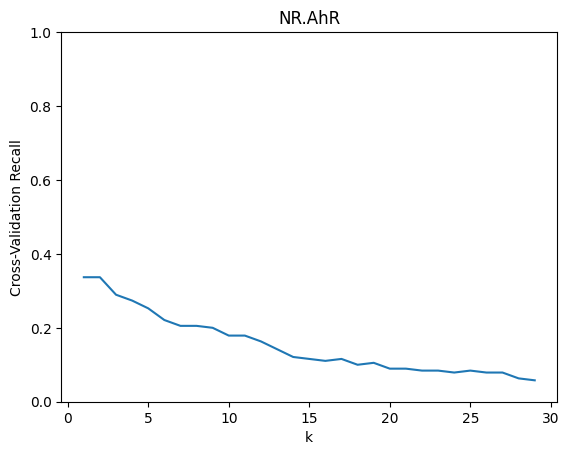

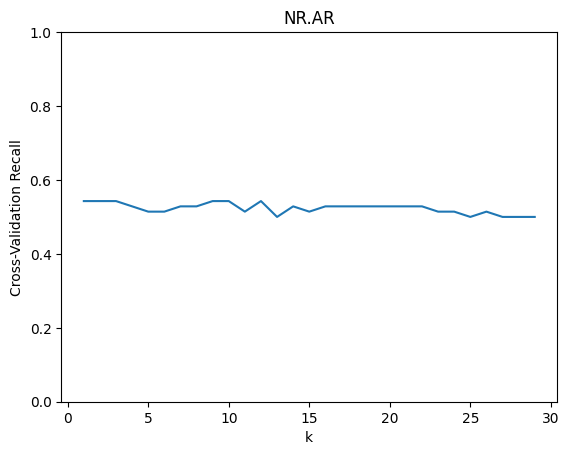

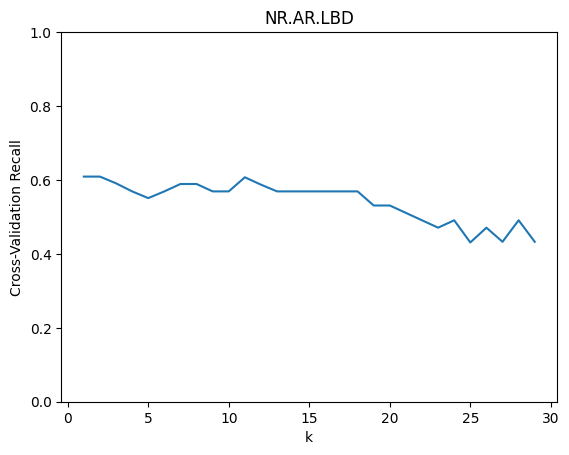

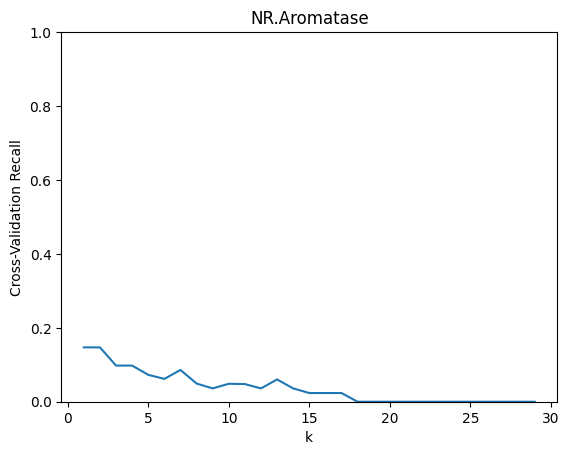

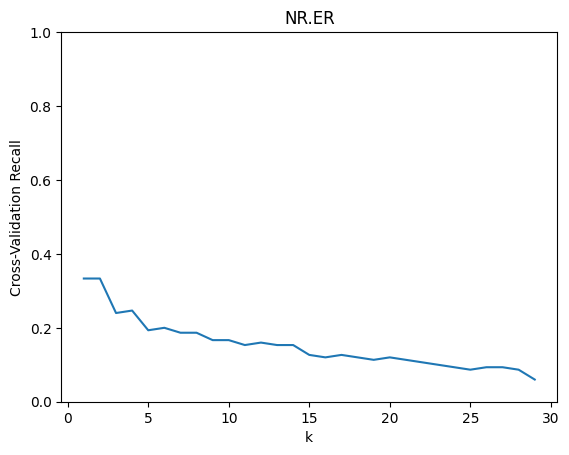

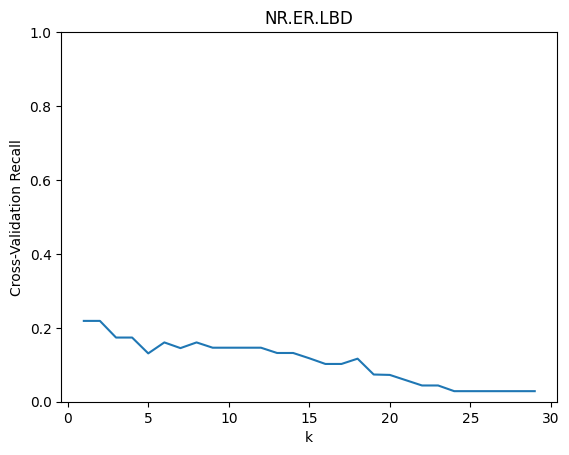

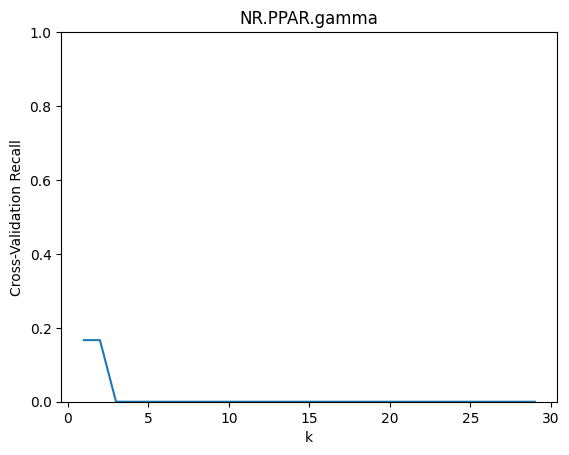

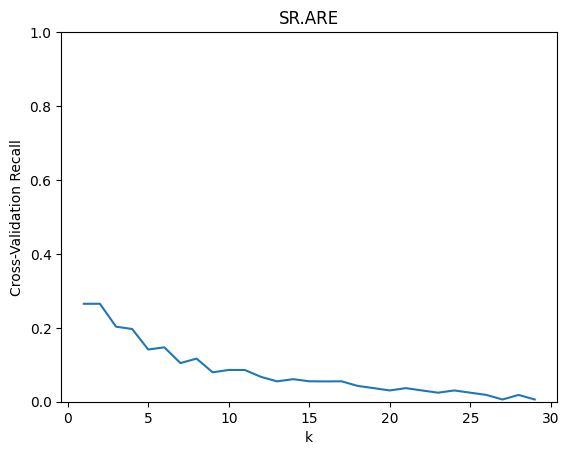

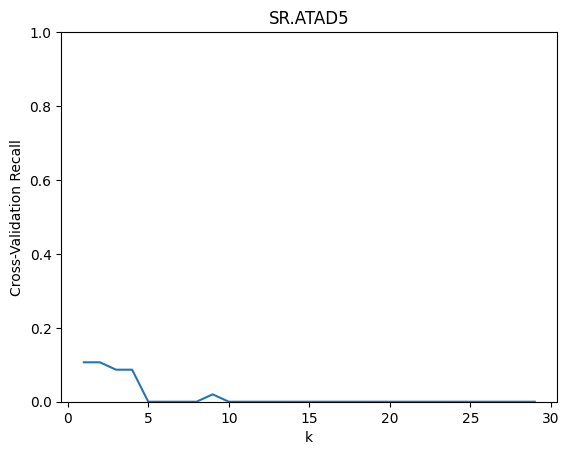

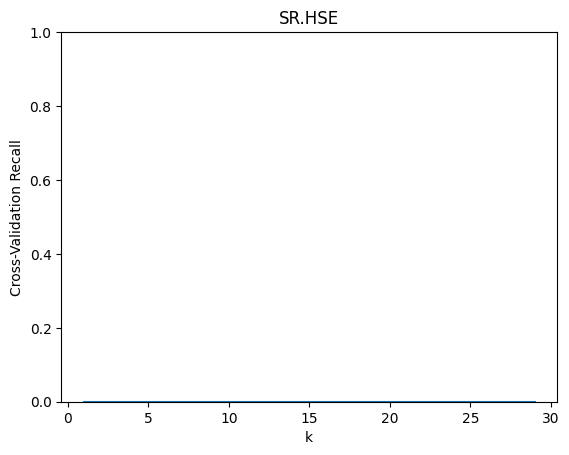

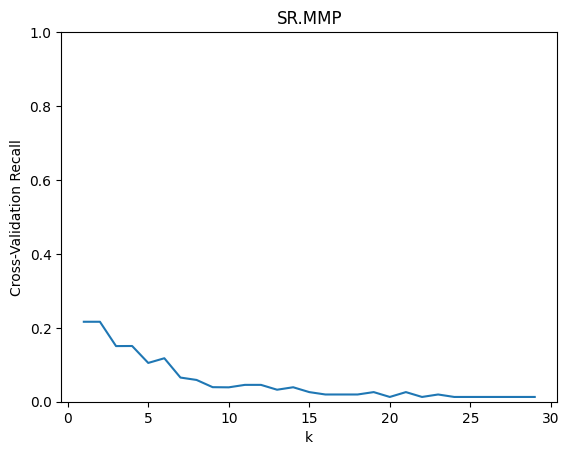

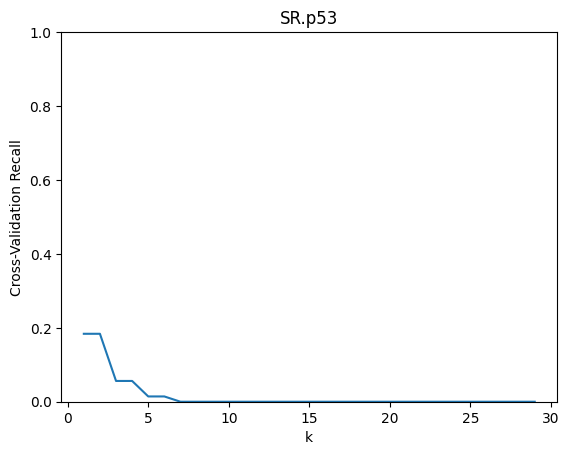

In [5]:
for endpoint in endpoints:
    best_k(endpoint, df)

### k-NN metrics

In [12]:
from sklearn.metrics import precision_recall_fscore_support

def calc_metrics (endpoint, df):

    data = pd.DataFrame()
    
    data=df.copy()
    
    #Drop NA labels
    data.dropna(subset=[endpoint], inplace=True)
    
    # Split data into features and labels
    X = data.iloc[:, :-12] 
    y = data[endpoint]   
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Initialize k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=1, metric='cosine', weights='distance')
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

    return endpoint, recall, precision, f1_score

In [13]:
columns = ['endpoint','recall','precision','F1-score']
rows = []
for endpoint in endpoints:
    rows.append(calc_metrics(endpoint, df))
metrics = pd.DataFrame(rows, columns=columns)
metrics

,endpoint,recall,precision,F1-score
0,NR.AhR,0.312500,0.294118,0.303030
1,NR.AR,0.470588,0.444444,0.457143
2,NR.AR.LBD,0.153846,0.333333,0.210526
3,NR.Aromatase,0.428571,0.428571,0.428571
4,NR.ER,0.289474,0.229167,0.255814
5,NR.ER.LBD,0.117647,0.095238,0.105263
6,NR.PPAR.gamma,0.000000,0.000000,0.000000
7,SR.ARE,0.250000,0.277778,0.263158
8,SR.ATAD5,0.000000,0.000000,0.000000
9,SR.HSE,0.076923,0.083333,0.080000
